In [46]:
#Assignment_08:-------------------------------------------LOGISTIC REGRESSION-------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import joblib 

In [4]:
df = pd.read_csv("diabetes (1).csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


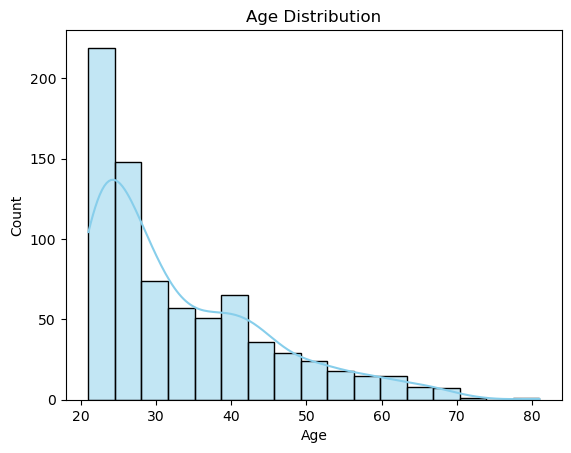

In [9]:
#c

sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

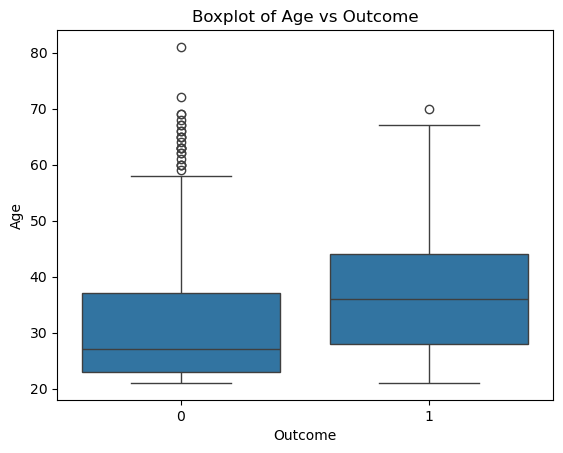

In [10]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Boxplot of Age vs Outcome')
plt.show()

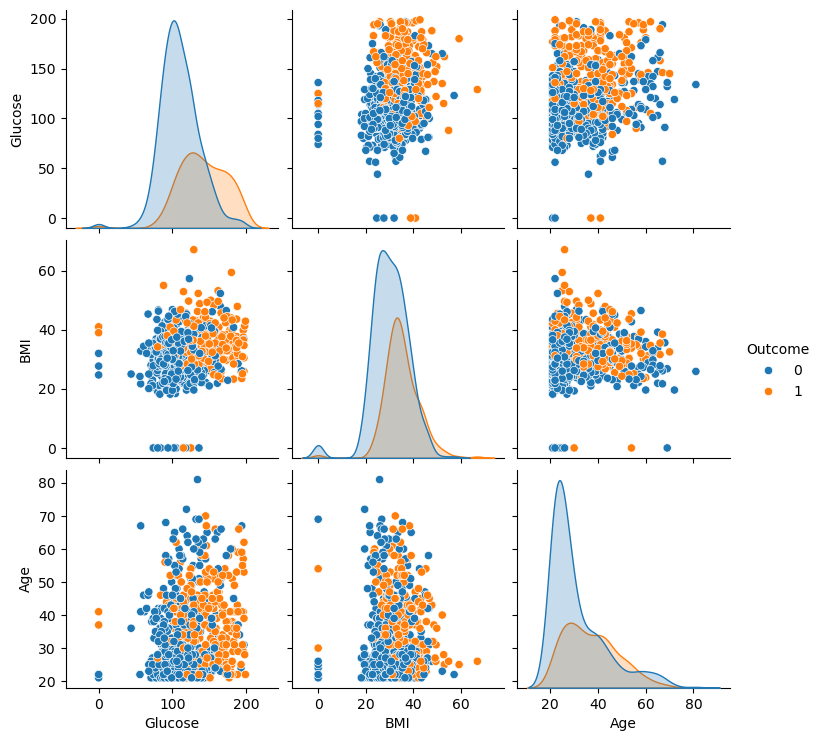

In [11]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

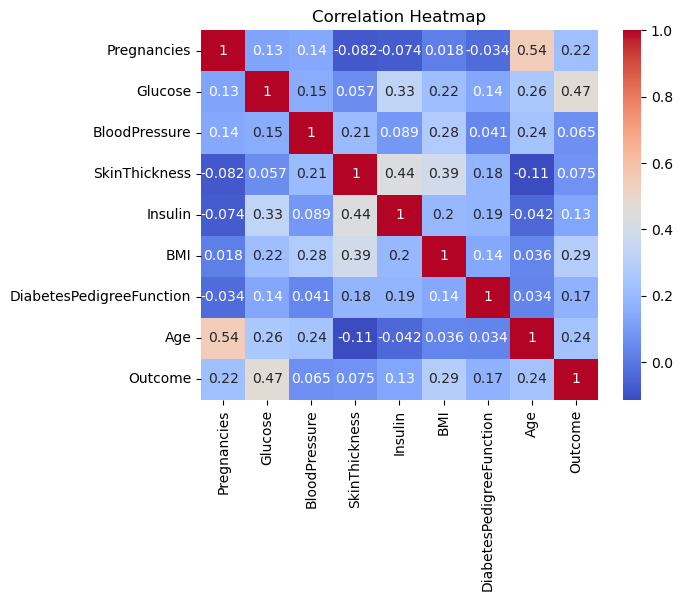

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Step 2: Data Preprocessing

In [14]:
df.fillna(df.median(), inplace=True)

In [15]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [16]:
df_cont = df.iloc[:,0:4]

In [17]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(df_cont)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df_cont)
SS_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness
0,0.639947,0.848324,0.149641,0.907270
1,-0.844885,-1.123396,-0.160546,0.530902
2,1.233880,1.943724,-0.263941,-1.288212
3,-0.844885,-0.998208,-0.160546,0.154533
4,-1.141852,0.504055,-1.504687,0.907270


In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X,Y)

C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
Y_pred = model.predict(X)
Y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [20]:
model.predict_proba(X)

array([[0.28902594, 0.71097406],
       [0.94446009, 0.05553991],
       [0.17425005, 0.82574995],
       ...,
       [0.82665052, 0.17334948],
       [0.71230769, 0.28769231],
       [0.92140618, 0.07859382]])

In [21]:
y_pred_prob = model.predict_proba(X)[:,1:]

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
cm = confusion_matrix(Y,Y_pred)

In [23]:
print("confusion matrix:\n", cm)

confusion matrix:
 [[447  53]
 [114 154]]


In [24]:
score = accuracy_score(Y,Y_pred)
print("Accuracy score: ", score)

Accuracy score:  0.7825520833333334


In [25]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

r_score = recall_score(Y,Y_pred)
print("sensitivity score: ", np.round(r_score,2))

s_score = recall_score(Y_pred,Y)
print("specificity score: ", np.round(s_score,2))

p_score = precision_score(Y,Y_pred)
print("precision score: ", np.round(p_score,2))

f1score = f1_score(Y,Y_pred)
print("f1 score: ", np.round(f1score,2))

sensitivity score:  0.57
specificity score:  0.74
precision score:  0.74
f1 score:  0.65


In [26]:
y_pred_prob = model.predict_proba(X)[:,1:]

In [27]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

TPR,FPR, dummy = roc_curve(Y,y_pred_prob)

Auc = roc_auc_score(Y,y_pred_prob)
print("Area under curve score: ", np.round(Auc,2))

Area under curve score:  0.84


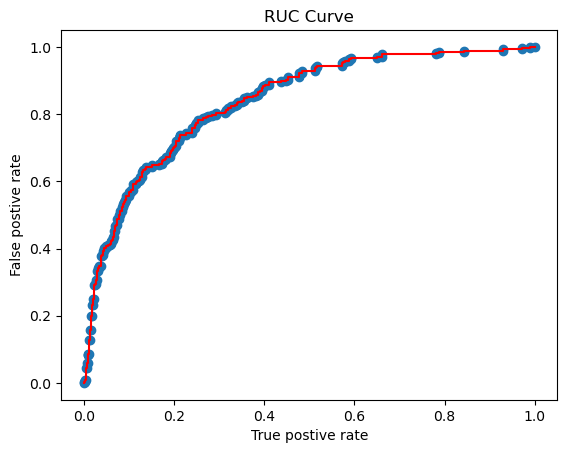

In [28]:
import matplotlib.pyplot as plt
plt.scatter(TPR,FPR)
plt.plot(TPR,FPR,color='red')
plt.xlabel("True postive rate")
plt.ylabel("False postive rate")
plt.title('RUC Curve')
plt.show()

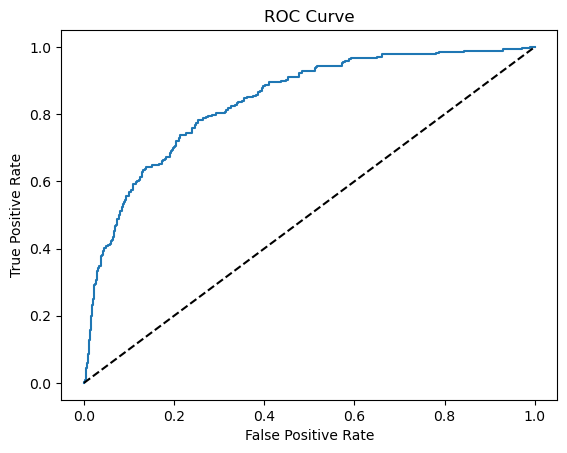

In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(Y,y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [32]:
# Step 5: Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
6,DiabetesPedigreeFunction,1.419040
0,Pregnancies,0.117252
5,BMI,0.077203
1,Glucose,0.033599
7,Age,0.010036
4,Insulin,-0.001240
3,SkinThickness,-0.001271
2,BloodPressure,-0.014087


In [45]:
# Step 6: Deployment with Streamlit

# Save model and scaler
joblib.dump(log_reg, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')